In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
url = "/content/task-2.csv"
data = pd.read_csv(url)
df =  data.copy()

In [11]:
df.drop(columns=['student_id'] , inplace=True)


# DATA INSIGHTS
  -  QUIZ 1 ,QUIZ  2 , ASSIGEMNT , FINAL HAS 6% OF DATA MISSING

In [18]:
(df.isna().sum() / df.shape[0] )*100

,0
name,0.000000
course,0.000000
quiz1,6.666667
quiz2,6.666667
assignment,6.666667
midterm,0.000000
final,6.666667
attendance,0.000000
semester,0.000000


In [29]:
(df['quiz1'].isnull()).sum() # 1 value is missing
(df['quiz2'].isnull()).sum()  # 1 value is missing
(df['quiz1']<0).sum() # 0
(df['quiz2']<0).sum()  # 0

np.int64(0)

In [38]:
df['quiz1'].dtype
df['quiz2'].dtype
# df['quiz1'].astype(np.int8)

dtype('float64')

In [43]:
val =  df['quiz1'].mean()
df['quiz1'].fillna(val,inplace=True)

In [44]:
val =  df['quiz2'].mean()
df['quiz2'].fillna(val,inplace=True)


/tmp/ipython-input-2608536645.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['quiz2'].fillna(val,inplace=True)


In [49]:
df['quiz1']  = df['quiz1'].round(2)
df['quiz2'] =   df['quiz2'].round(2)


In [54]:
df

,name,course,quiz1,quiz2,assignment,midterm,final,attendance,semester
0,Ali Khan,Mathematics,8.00,7.00,18.0,25,45.0,90,1
1,Sara Ahmed,Physics,7.00,6.71,15.0,20,40.0,85,1
2,Omar Malik,Chemistry,9.00,8.00,NaN,28,48.0,95,1
3,Ayesha Khan,Mathematics,6.00,5.00,14.0,22,NaN,80,1
4,Usman Iqbal,Physics,11.00,7.00,18.0,26,49.0,105,1
5,Hina Raza,Chemistry,8.00,8.00,17.0,27,-10.0,92,1
6,Zain Ali,Mathematics,7.00,7.00,16.0,23,44.0,88,1
7,Nadia Khan,Physics,7.57,6.00,15.0,21,39.0,82,1
8,Fahad Iqbal,Chemistry,8.00,7.00,16.0,25,47.0,90,1
9,Maryam Ali,Mathematics,7.00,6.00,14.0,22,42.0,80,1


In [63]:
l = ["assignment", "midterm", "final", "attendance"]
d = {}


for i in l:
    val = df[i].dropna().mean()
    d[i] = val


for i in l:
    df[i].fillna(d[i], inplace=True)




/tmp/ipython-input-3131653828.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(d[i], inplace=True)


In [71]:
df

,name,course,quiz1,quiz2,assignment,midterm,final,attendance,semester
0,Ali Khan,Mathematics,8.00,7.00,18.0,25,45.000000,90,1
1,Sara Ahmed,Physics,7.00,6.71,15.0,20,40.000000,85,1
2,Omar Malik,Chemistry,9.00,8.00,16.0,28,48.000000,95,1
3,Ayesha Khan,Mathematics,6.00,5.00,14.0,22,39.428571,80,1
4,Usman Iqbal,Physics,11.00,7.00,18.0,26,49.000000,105,1
5,Hina Raza,Chemistry,8.00,8.00,17.0,27,-10.000000,92,1
6,Zain Ali,Mathematics,7.00,7.00,16.0,23,44.000000,88,1
7,Nadia Khan,Physics,7.57,6.00,15.0,21,39.000000,82,1
8,Fahad Iqbal,Chemistry,8.00,7.00,16.0,25,47.000000,90,1
9,Maryam Ali,Mathematics,7.00,6.00,14.0,22,42.000000,80,1


In [78]:
mask  =df['final'] <0
df.loc[mask , "final"] = df['final'].mean()


In [86]:
df['total_score']  = df['quiz1'] + df['quiz2'] + df['assignment'] + df['midterm']+df['final']


<Axes: xlabel='total_score', ylabel='Density'>

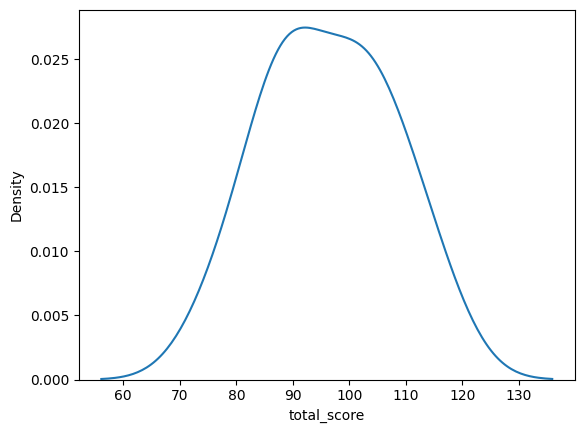

In [89]:
sns.kdeplot(df['total_score'])